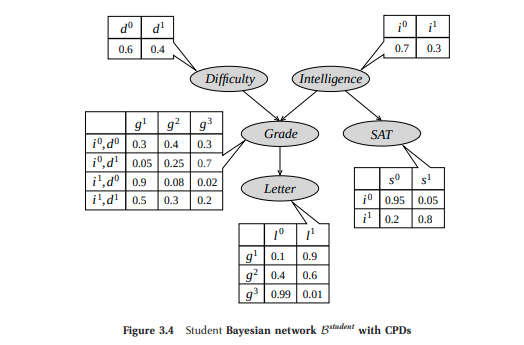

In [1]:
from IPython.display import Image
Image("../images/student_model_diagram.png")

## 1. Define the model 

In [2]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

# Define model
student_model=BayesianModel([("Difficulty", "Grade"), ("Intelligence", "Grade"), ("Intelligence","SAT"), ("Grade","Letter")])



## 2. Define conditional probability distributions

In [3]:
# Add CPDs
cpd_difficulty = TabularCPD("Difficulty", variable_card=2, values=[[0.6],[0.4]])
cpd_intelligence = TabularCPD("Intelligence", variable_card=2, values=[[0.7],[0.3]])

cpd_grade = TabularCPD("Grade", variable_card =3, evidence=["Intelligence","Difficulty"], values = [[0.3, 0.05, 0.9, 0.5],[0.4, 0.25, 0.08, 0.3], [0.3, 0.7, 0.02, 0.2]], evidence_card=[2,2])

cpd_sat = TabularCPD("SAT", variable_card =2, evidence = ["Intelligence"], values=[[0.95, 0.2],[0.05, 0.8]], evidence_card=[2])

cpd_letter = TabularCPD("Letter", variable_card=2, evidence=["Grade"], values=[[0.1, 0.4, 0.99], [0.9, 0.6, 0.01]], evidence_card=[3])



## 3. Apply CPDs to model

In [4]:
# Add CPD to the model

student_model.add_cpds(cpd_difficulty, cpd_intelligence, cpd_grade, cpd_sat, cpd_letter)

# Check model integrity
student_model.check_model()


True

## Reasoning patterns

### 1. Causal reasoning/prediction
Queries such as these, where we predict the “downstream” effects of various factors, are instances of causal reasoning or prediction.
For example what is the probability of George getting a strong letter given he is intelligent.



#### Q.1 What is the probability of George getting a strong recommendation letter in Economics given we know nothing about George or economics?

In [5]:
from pgmpy.inference import BeliefPropagation

student_infer = BeliefPropagation(student_model)

q = student_infer.query(variables=['Letter'], evidence=None)
print(q)

# Probability of George getting strong letter in general is .50

Eliminating: Grade: 100%|██████████| 1/1 [00:00<00:00, 1487.87it/s]

+-----------+---------------+
| Letter    |   phi(Letter) |
+===========+===============+
| Letter(0) |        0.4977 |
+-----------+---------------+
| Letter(1) |        0.5023 |
+-----------+---------------+


#### Q2. How does probability of him getting strong letter changes  if we know George is not that intelligent.


In [6]:
# calculate P(Intelligence=high | Intelligence=low)

q= student_infer.query(variables=['Letter'], evidence={"Intelligence":0})
print(q)

# Observe how probabilty drops(from .502 to .38) in the light of new data.

Eliminating: SAT: 100%|██████████| 3/3 [00:00<00:00, 1110.58it/s]

+-----------+---------------+
| Letter    |   phi(Letter) |
+===========+===============+
| Letter(0) |        0.6114 |
+-----------+---------------+
| Letter(1) |        0.3886 |
+-----------+---------------+


#### Q3. In addition to existing information that George is not an intellgent student we come across fresh evidence that  Economics is an easy subject. 

In [7]:
# calculate P(Intelligence = high |Intelligence=low, dufficulty= easy)
q= student_infer.query(variables=['Letter'], evidence={"Intelligence":0, "Difficulty":0})
print(q)

# Probability of George getting a strong letter has now increased to .51

Eliminating: SAT: 100%|██████████| 2/2 [00:00<00:00, 1447.31it/s]

+-----------+---------------+
| Letter    |   phi(Letter) |
+===========+===============+
| Letter(0) |        0.4870 |
+-----------+---------------+
| Letter(1) |        0.5130 |
+-----------+---------------+


### 2. Evidential reasoning
Queries where we reason from effects to causes, are instances of evidential
reasoning or explanation


For example What is the probability that George is intelligent given the information that he got strong ecommendation letter.

In [8]:
# Lets say we want to hire George on the basis of his intelligence  

# In general it is 30% likely that George is intelligent

q= student_infer.query(variables=['Intelligence'], evidence=None)
print(q)


Eliminating: SAT: 100%|██████████| 3/3 [00:00<00:00, 1137.59it/s]

+-----------------+---------------------+
| Intelligence    |   phi(Intelligence) |
+=================+=====================+
| Intelligence(0) |              0.7000 |
+-----------------+---------------------+
| Intelligence(1) |              0.3000 |
+-----------------+---------------------+


In [9]:
# Now we come to know that George got C grade in Economics
q= student_infer.query(variables=['Intelligence'], evidence={"Grade":2})
print(q)

# Now probability of George being intelligent drops to 7%

Eliminating: SAT: 100%|██████████| 3/3 [00:00<00:00, 1739.65it/s]

+-----------------+---------------------+
| Intelligence    |   phi(Intelligence) |
+=================+=====================+
| Intelligence(0) |              0.9211 |
+-----------------+---------------------+
| Intelligence(1) |              0.0789 |
+-----------------+---------------------+


### 2. Intercausal reasoning
Explaining away is an instance of a general reasoning pattern called intercausal reasoning, where different
causes of the same effect can interact. This type of reasoning is a very common pattern
in human reasoning.


In [10]:
# We get to know that difficulty of Economics is high, Now the intelligence is given by 
# P(Intelligence=High | Grade = "C", Difficulty="High")

q= student_infer.query(variables=['Intelligence'], evidence={"Grade":2, "Difficulty":1})
print(q)

# As we can see the probability of George being intelligent goes up to 11% . In a way are able to give 
# partial explaination Poor grade by the difficulty of the subject

Eliminating: SAT: 100%|██████████| 2/2 [00:00<00:00, 1391.38it/s]

+-----------------+---------------------+
| Intelligence    |   phi(Intelligence) |
+=================+=====================+
| Intelligence(0) |              0.8909 |
+-----------------+---------------------+
| Intelligence(1) |              0.1091 |
+-----------------+---------------------+
